In [3]:
from models.candlestick import Candlestick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def logDiff(x):
    x_diff = 100*np.log(x/x.shift(1))
    return x_diff

candlestick = Candlestick()
df = candlestick.to_df()
data = logDiff(df['close'])

print(df['close'].count())



1279


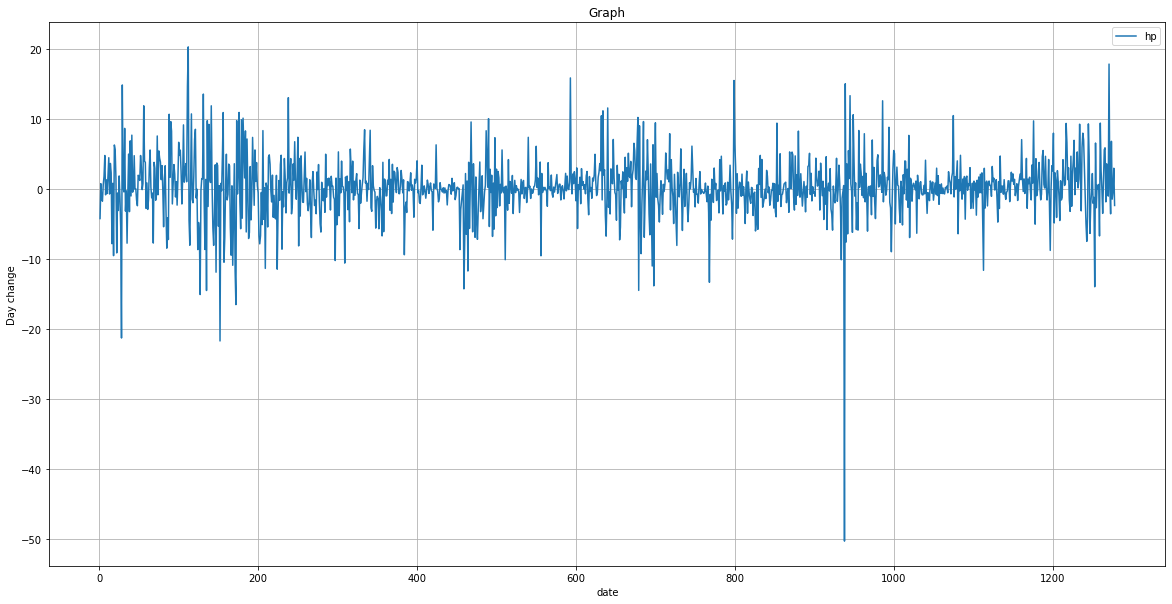

In [5]:


plt.figure(figsize=(20,10))

plt.plot(data, label='hp')

plt.xlabel('date')
plt.ylabel('Day change')
plt.title('Graph')
plt.grid(True)

plt.legend()
plt.show()


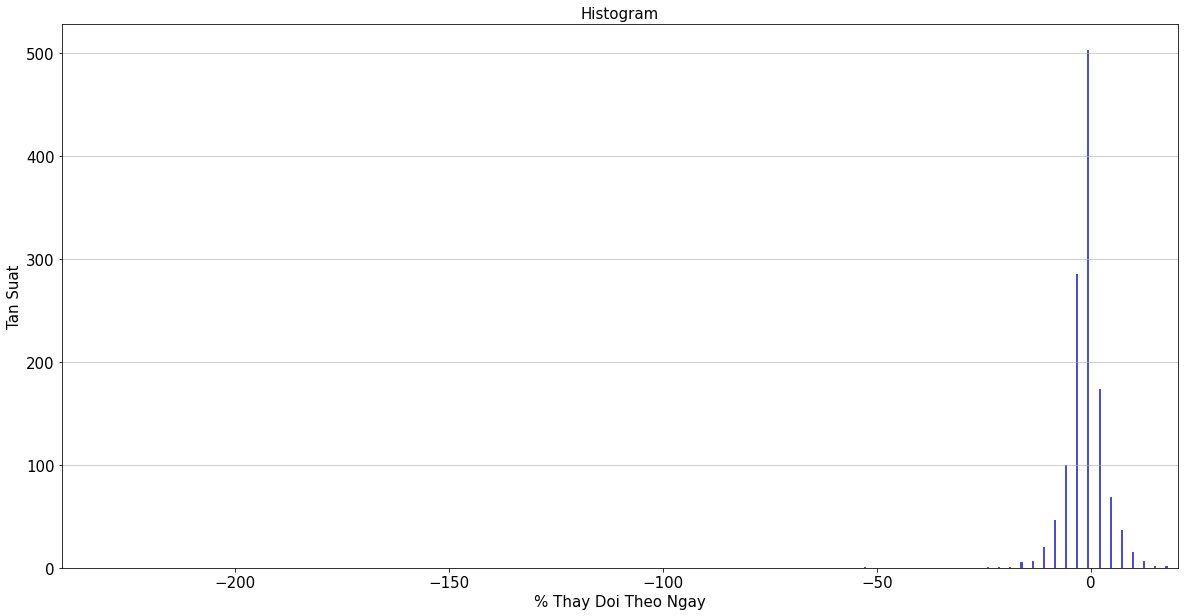

In [4]:
data = np.array(data.tolist())
data = data[~np.isnan(data)]

hist,bin_edges = np.histogram(data, bins=100)

# print(f"{hist},{bin_edges}")

plt.figure(figsize=[20,10])

plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('% Thay Doi Theo Ngay',fontsize=15)
plt.ylabel('Tan Suat',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram',fontsize=15)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

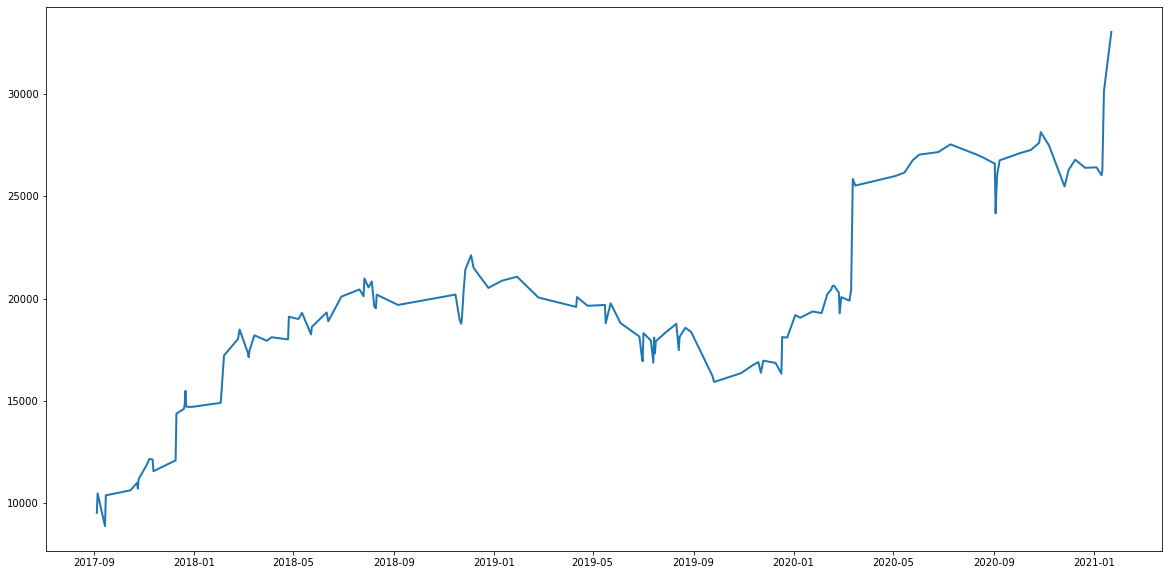

In [6]:
fund = 10000

x_column = []
y_column = []

count = 0

for index, row in df.iterrows():
    if index < 14 or index > df['close'].count() - 2:
        continue
    if ((float(row['atr14']) > float(df.iloc[index - 1]['atr14'])) and (float(row['low']) > float(df.iloc[index + 1]['low']))):
        count = count + 1
        fund = fund*float(df.iloc[index + 1]['close'])/float(row['low'])
        x_column.append(fund)
        y_column.append(df.iloc[index + 1]['date'])

plt.figure(figsize=(20,10))
plt.plot(y_column,x_column,linewidth=2, markersize=121)
plt.show

[2.0172318836521255, 1.8576710471549474, 1.717399600964265, 0.8156542976636492, 2.2116533864541763, 5.589108910891094, 6.263232223548315, 3.195080641611109, 2.01650205107599, 1.4423254269799792]
[99.95089945930741, 99.95512850189724, 99.95797166620666, 99.9796898830263, 99.9452561042957, 99.86414449865481, 99.8548837416144, 99.92536044176134, 99.9535093960706, 99.96653545056787]


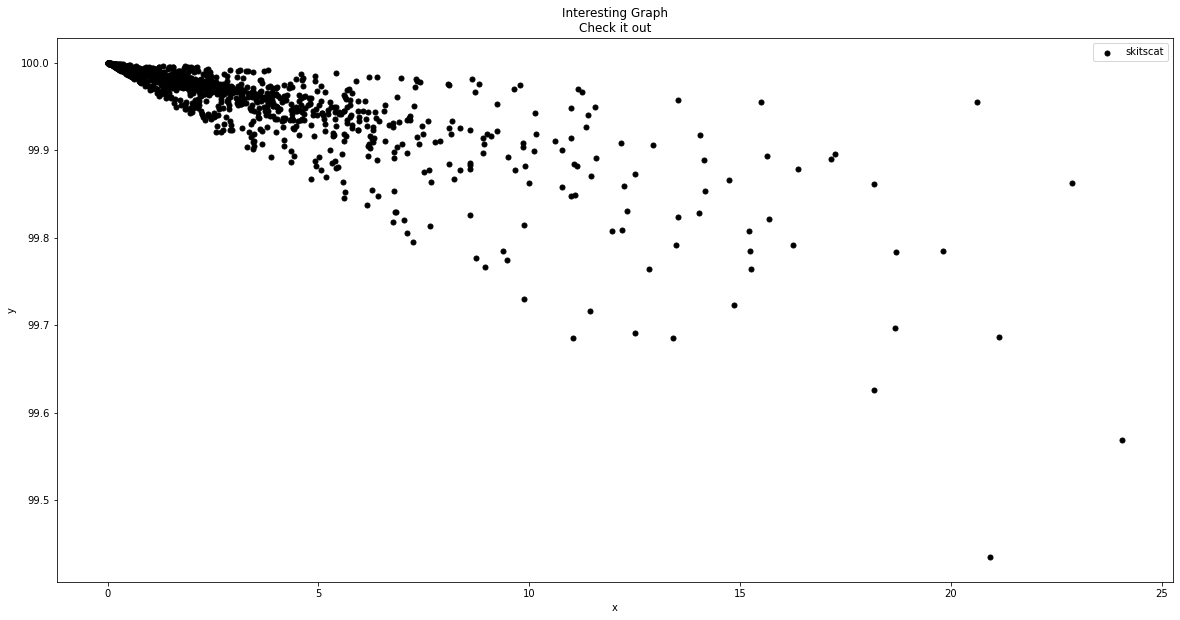

In [10]:
x_asiex = []
y_asiex = []


for index, row in df.iterrows():
    if index < 1 or index > df['close'].count() - 2:
        continue

    ath_high = 100*(abs(df.iloc[index - 1]['close'] - row['high'])/df.iloc[index - 1]['close'])
    ath_low = 100*(abs(df.iloc[index - 1]['close'] - row['high'])/df.iloc[index - 1]['close'])

    if ath_high >= ath_low:
        x_asiex.append(ath_high)
        diff = abs(ath_high - row['close'])
        y_asiex.append(diff/row['close']*100)
    else:
        x_asiex.append(ath_low)
        diff = abs(ath_low - row['close'])
        y_asiex.append(diff/row['close']*100)

print(x_asiex[:10])
print(y_asiex[:10])

plt.figure(figsize=(20,10))
plt.scatter(x_asiex,y_asiex, label='skitscat', color='k', s=25, marker="o")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()